In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Erste fünf Zeilen des Datensatzes:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0  

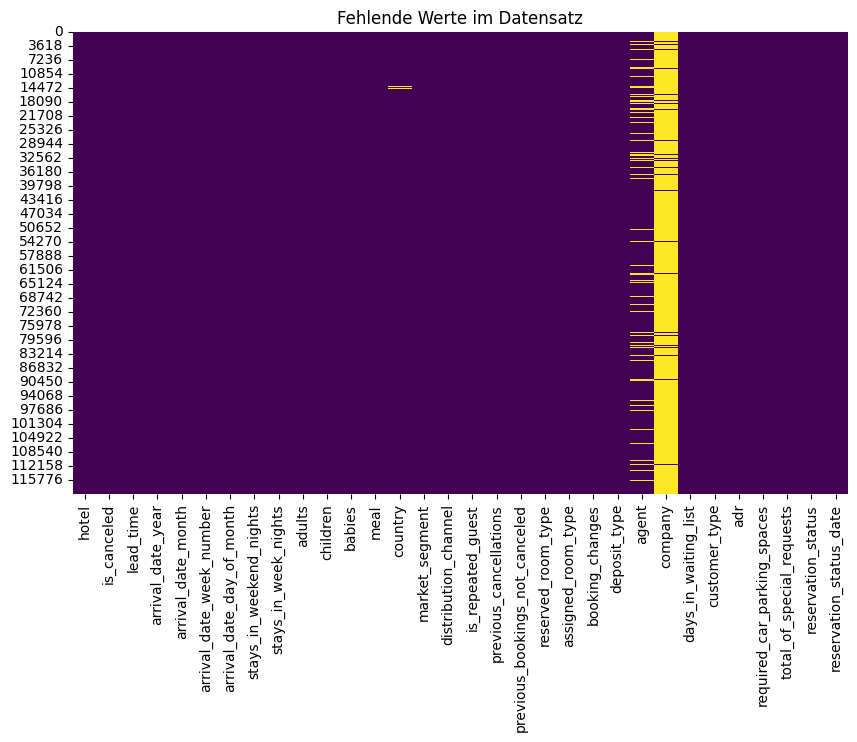

/var/folders/1y/8p8pybcn4gz6hfmhl7b29ysm0000gn/T/ipykernel_2248/2853439259.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hotel', data=df, palette='coolwarm')


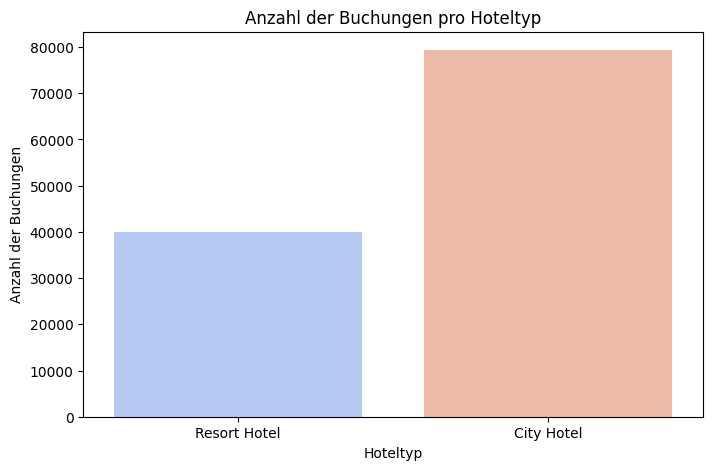

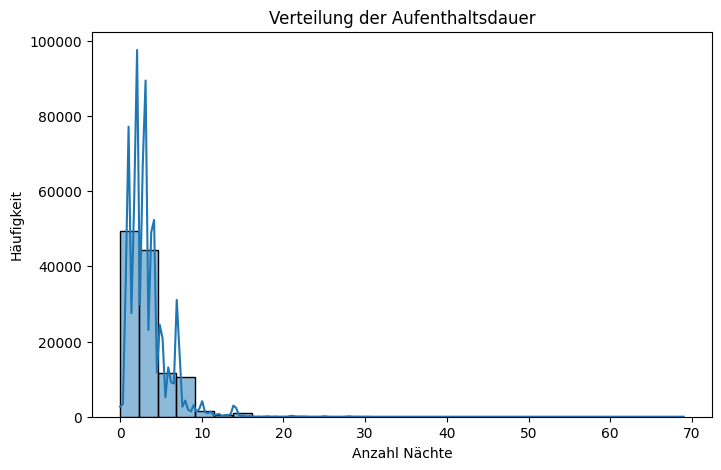

/var/folders/1y/8p8pybcn4gz6hfmhl7b29ysm0000gn/T/ipykernel_2248/2853439259.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_date_month', data=df, order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], palette='viridis')


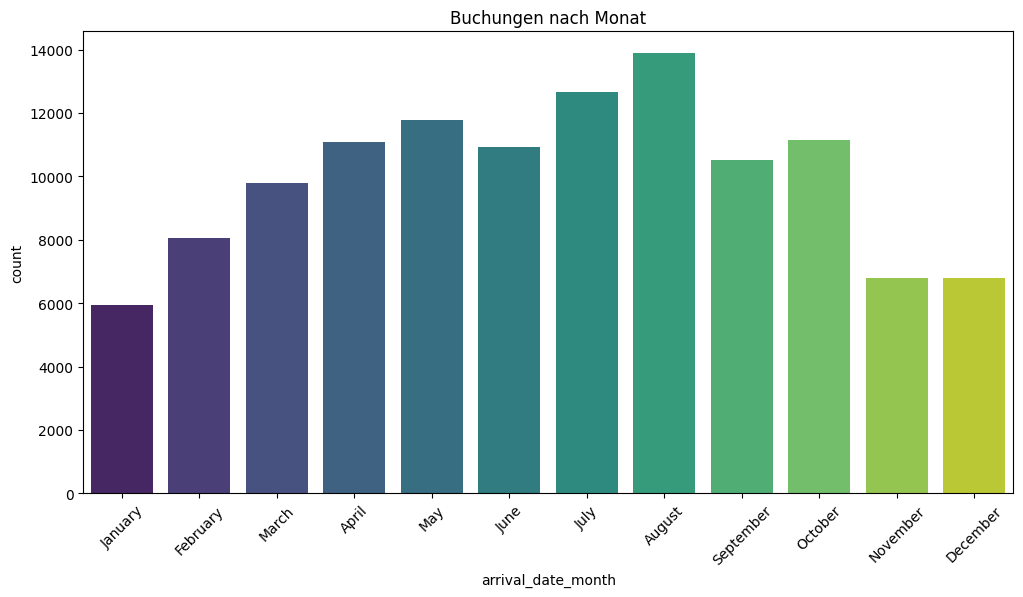

Stornierungsrate:
is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


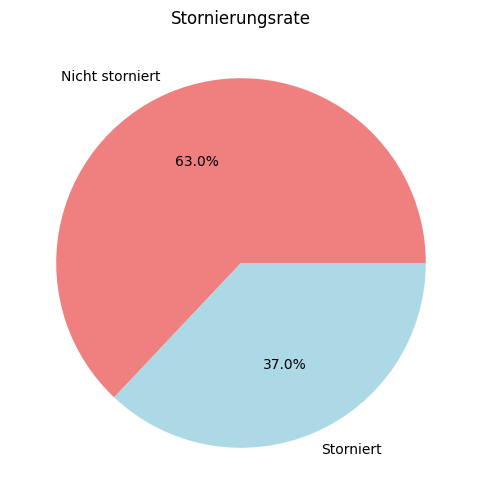

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei laden
df = pd.read_csv('hotel_bookings.csv')

# Überblick über die Daten
def data_overview(df):
    print("Erste fünf Zeilen des Datensatzes:")
    print(df.head())
    print("\nAllgemeine Informationen:")
    print(df.info())
    print("\nStatistische Kennzahlen:")
    print(df.describe())
    print("\nAnzahl fehlender Werte pro Spalte:")
    print(df.isnull().sum())

data_overview(df)

# Visualisierung der fehlenden Werte
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Fehlende Werte im Datensatz')
plt.show()

# Verteilung der Buchungen nach Hoteltyp
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', data=df, palette='coolwarm')
plt.title('Anzahl der Buchungen pro Hoteltyp')
plt.xlabel('Hoteltyp')
plt.ylabel('Anzahl der Buchungen')
plt.show()

# Verteilung der Aufenthaltsdauer
plt.figure(figsize=(8, 5))
sns.histplot(df['stays_in_week_nights'] + df['stays_in_weekend_nights'], bins=30, kde=True)
plt.title('Verteilung der Aufenthaltsdauer')
plt.xlabel('Anzahl Nächte')
plt.ylabel('Häufigkeit')
plt.show()

# Monatsweise Buchungen
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=df, order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], palette='viridis')
plt.title('Buchungen nach Monat')
plt.xticks(rotation=45)
plt.show()

# Stornierungsrate untersuchen
cancellation_rate = df['is_canceled'].value_counts(normalize=True) * 100
print("Stornierungsrate:")
print(cancellation_rate)

plt.figure(figsize=(6, 6))
cancellation_rate.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], labels=['Nicht storniert', 'Storniert'])
plt.title('Stornierungsrate')
plt.ylabel('')
plt.show()
